## Capstone Project: Dry Bean Classification Using Machine Learning

## Introduction

### Objective: Classify different types of dry beans based on their morphological features using machine learning.

### Dataset: Dry Bean Dataset from the UCI Machine Learning Repository.

### Features: Includes geometric properties like Area, Perimeter, MajorAxisLength, MinorAxisLength, AspectRatio, Compactness, ShapeFactor1, ShapeFactor2, ShapeFactor3, and ShapeFactor4.

### Target Variable: Bean Type (e.g., Seker, Barbunya, Bombay, Cali, Dermosan, Horoz, Sira).

# Step 1: Collecting Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from scipy import stats

import warnings
from sklearn.preprocessing import LabelEncoder, StandardScaler,MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_excel('Dry_Bean_Dataset.xlsx')

In [4]:
df.head()

Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0  28395    610.291       208.178117       173.888747      1.197191   
1  28734    638.018       200.524796       182.734419      1.097356   
2  29380    624.110       212.826130       175.931143      1.209713   
3  30008    645.884       210.557999       182.516516      1.153638   
4  30140    620.134       201.847882       190.279279      1.060798   

   Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0      0.549812       28715     190.141097  0.763923  0.988856   0.958027   
1      0.411785       29172     191.272750  0.783968  0.984986   0.887034   
2      0.562727       29690     193.410904  0.778113  0.989559   0.947849   
3      0.498616       30724     195.467062  0.782681  0.976696   0.903936   
4      0.333680       30417     195.896503  0.773098  0.990893   0.984877   

   Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  Class  
0     0.913358      0.007332      0.003147      0.834222      0.998724  SEKER  
1     0.953861      0.006979      0.003564      0.909851      0.998430  SEKER  
2     0.908774      0.007244      0.003048      0.825871      0.999066  SEKER  
3     0.928329      0.007017      0.003215      0.861794      0.994199  SEKER  
4     0.970516      0.006697      0.003665      0.941900      0.999166  SEKER

# Step 2: Exploratory Data Analysis (EDA)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

In [6]:
df.shape

(13611, 17)

In [7]:
df.describe()

Area     Perimeter  MajorAxisLength  MinorAxisLength  \
count   13611.000000  13611.000000     13611.000000     13611.000000   
mean    53048.284549    855.283459       320.141867       202.270714   
std     29324.095717    214.289696        85.694186        44.970091   
min     20420.000000    524.736000       183.601165       122.512653   
25%     36328.000000    703.523500       253.303633       175.848170   
50%     44652.000000    794.941000       296.883367       192.431733   
75%     61332.000000    977.213000       376.495012       217.031741   
max    254616.000000   1985.370000       738.860153       460.198497   

       AspectRation  Eccentricity     ConvexArea  EquivDiameter        Extent  \
count  13611.000000  13611.000000   13611.000000   13611.000000  13611.000000   
mean       1.583242      0.750895   53768.200206     253.064220      0.749733   
std        0.246678      0.092002   29774.915817      59.177120      0.049086   
min        1.024868      0.218951   20684.000000     161.243764      0.555315   
25%        1.432307      0.715928   36714.500000     215.068003      0.718634   
50%        1.551124      0.764441   45178.000000     238.438026      0.759859   
75%        1.707109      0.810466   62294.000000     279.446467      0.786851   
max        2.430306      0.911423  263261.000000     569.374358      0.866195   

           Solidity     roundness   Compactness  ShapeFactor1  ShapeFactor2  \
count  13611.000000  13611.000000  13611.000000  13611.000000  13611.000000   
mean       0.987143      0.873282      0.799864      0.006564      0.001716   
std        0.004660      0.059520      0.061713      0.001128      0.000596   
min        0.919246      0.489618      0.640577      0.002778      0.000564   
25%        0.985670      0.832096      0.762469      0.005900      0.001154   
50%        0.988283      0.883157      0.801277      0.006645      0.001694   
75%        0.990013      0.916869      0.834270      0.007271      0.002170   
max        0.994677      0.990685      0.987303      0.010451      0.003665   

       ShapeFactor3  ShapeFactor4  
count  13611.000000  13611.000000  
mean       0.643590      0.995063  
std        0.098996      0.004366  
min        0.410339      0.947687  
25%        0.581359      0.993703  
50%        0.642044      0.996386  
75%        0.696006      0.997883  
max        0.974767      0.999733

In [8]:
df.isnull().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

### Visualizations using Matplotlib &  Seaborn

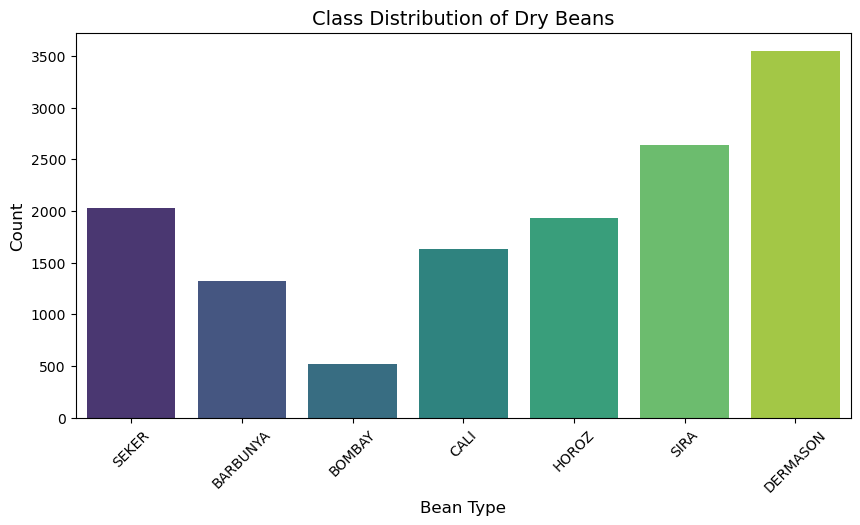

In [9]:
# Plot class distribution using countplot
plt.figure(figsize=(10, 5))
sns.countplot(x=df["Class"], palette="viridis")
plt.title("Class Distribution of Dry Beans", fontsize=14)
plt.xlabel("Bean Type", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45)
plt.show()

In [10]:
df_numeric = df.select_dtypes(include=['number'])
print(df_numeric.shape)

(13611, 16)


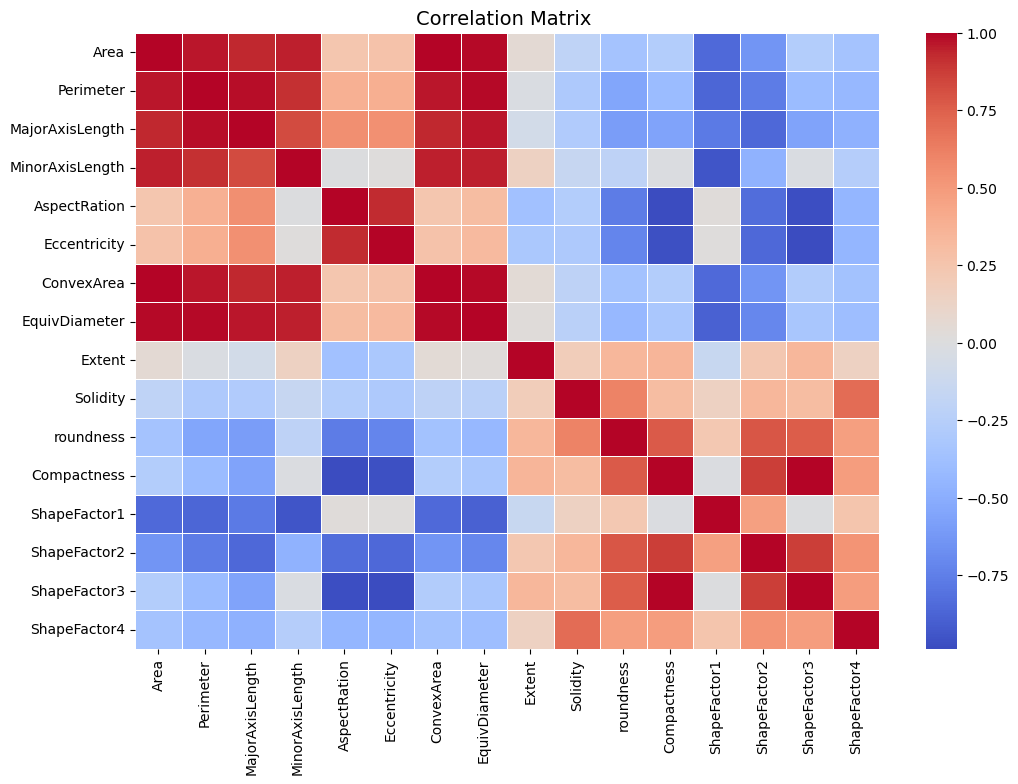

In [11]:
# Heatmap
corr_matrix = df_numeric.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=False, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix ", fontsize=14)
plt.show()

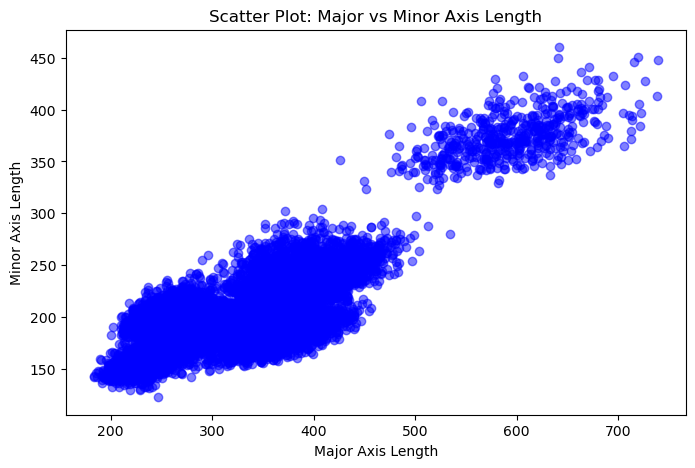

In [12]:
#Scatter Plot

plt.figure(figsize=(8, 5))
plt.scatter(df["MajorAxisLength"], df["MinorAxisLength"], alpha=0.5, c="blue")
plt.xlabel("Major Axis Length")
plt.ylabel("Minor Axis Length")
plt.title("Scatter Plot: Major vs Minor Axis Length")
plt.show()

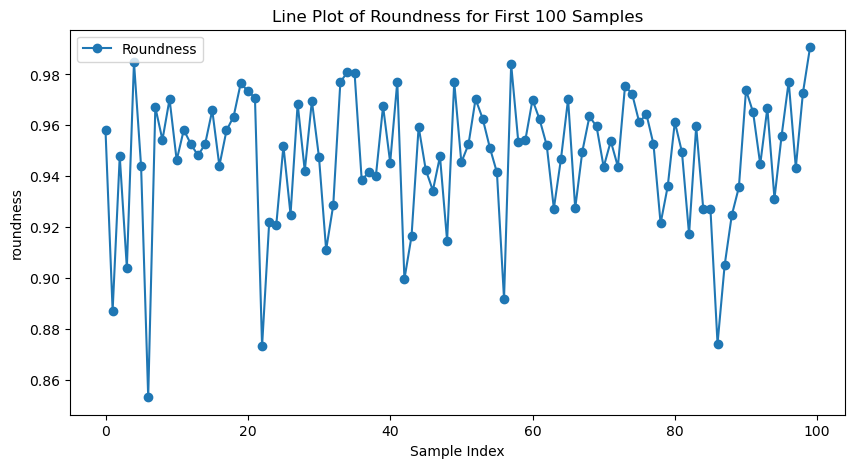

In [13]:
# Lineplot to show trends in a feature

plt.figure(figsize=(10, 5))
plt.plot(df["roundness"][:100], label="Roundness", marker="o", linestyle="-")
plt.xlabel("Sample Index")
plt.ylabel("roundness")
plt.title("Line Plot of Roundness for First 100 Samples")
plt.legend()
plt.show()

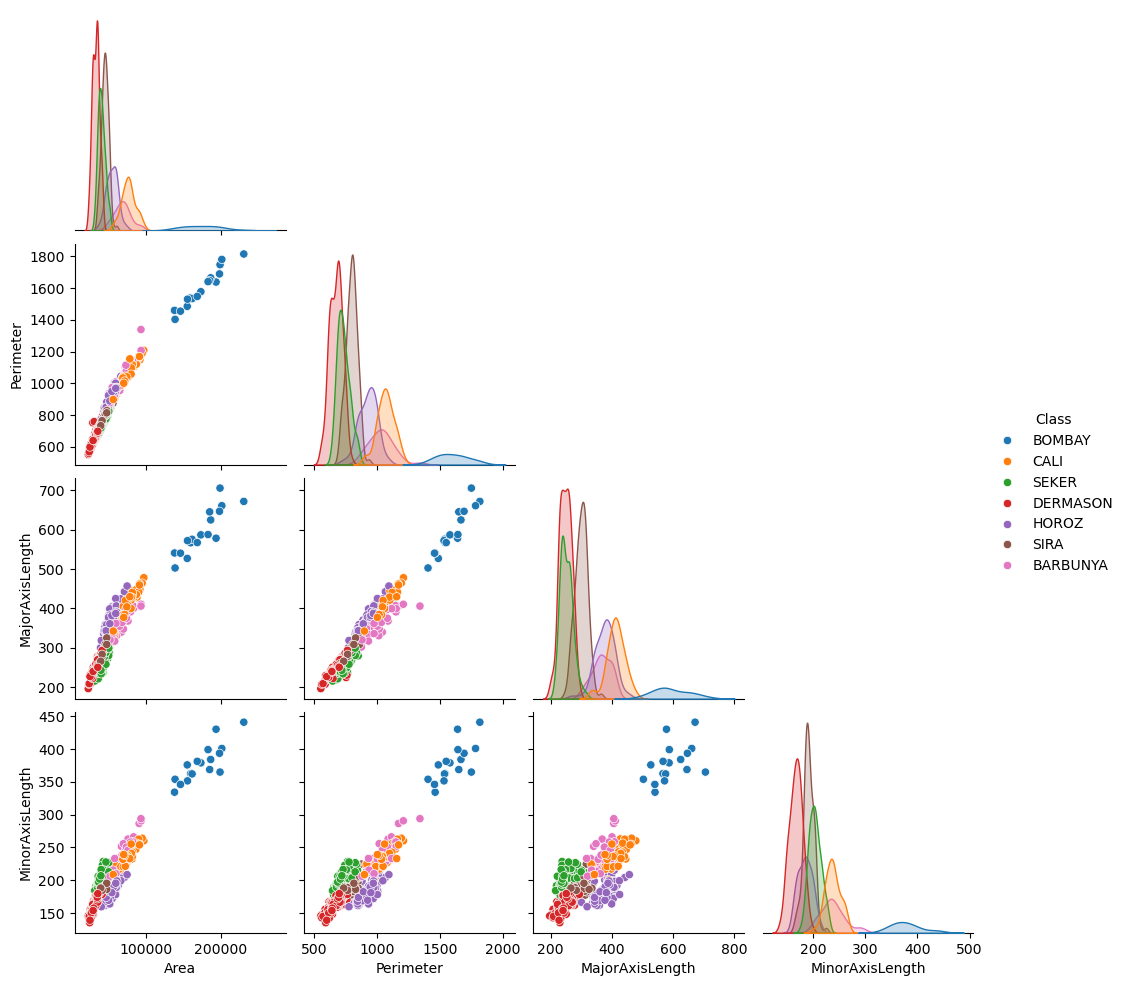

In [14]:
# Pair plot

selected_features = ["Area", "Perimeter", "MajorAxisLength", "MinorAxisLength", "Class"]
sns.pairplot(df[selected_features].sample(500), hue="Class", diag_kind="kde", corner=True)
plt.show()

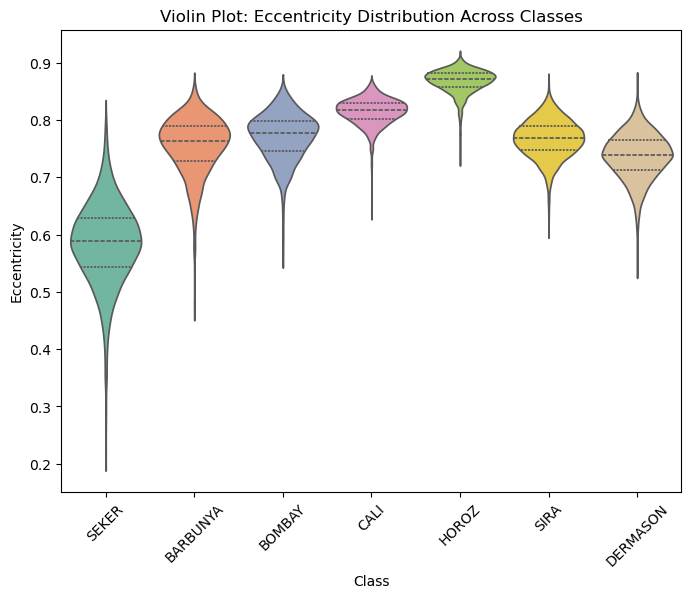

In [15]:
# Violin plot

plt.figure(figsize=(8, 6))
sns.violinplot(x="Class", y="Eccentricity", data=df, inner="quartile", palette="Set2")
plt.xticks(rotation=45)
plt.title("Violin Plot: Eccentricity Distribution Across Classes")
plt.show()

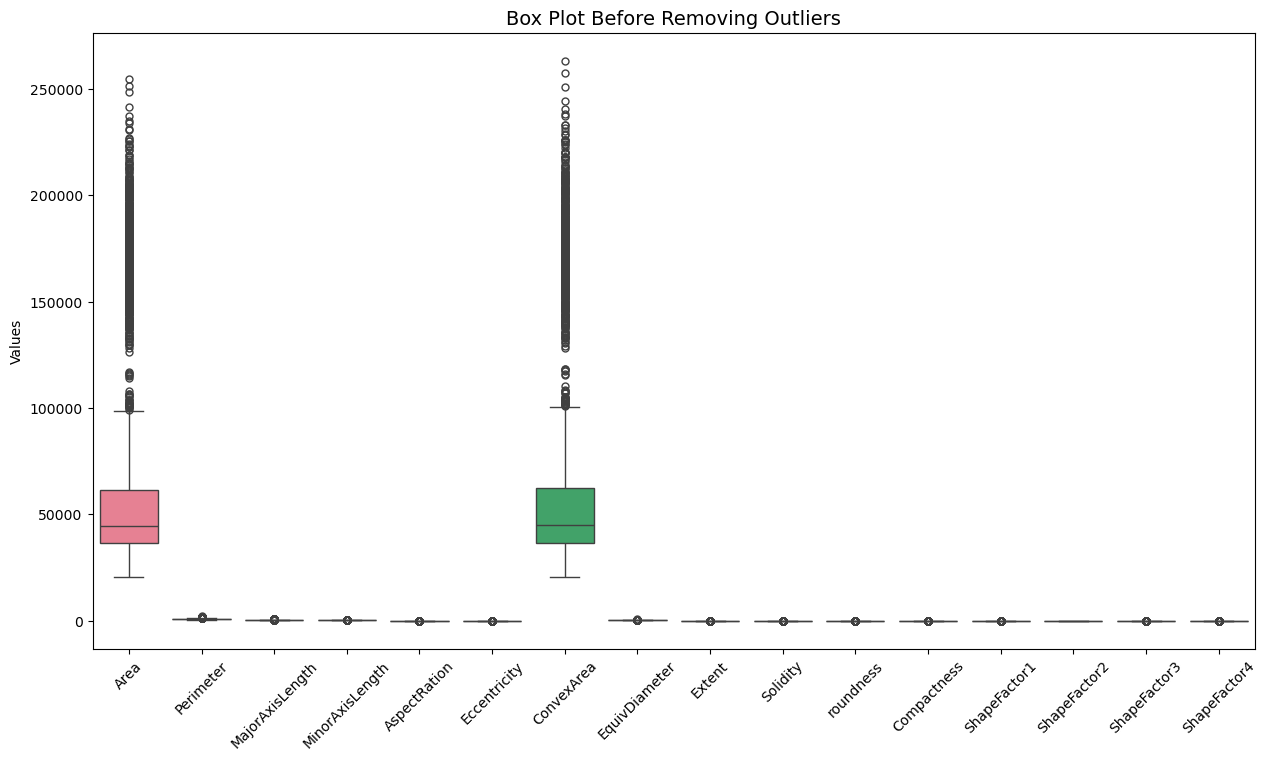

In [16]:
# Box plot Before removing Outliers
plt.figure(figsize=(15, 8))
sns.boxplot(data=df.drop(columns=["Class"]),flierprops={'marker':'o','color':'red','markersize':5})
plt.title("Box Plot Before Removing Outliers", fontsize=14)
plt.ylabel("Values")
plt.xticks(rotation=45)
plt.show()

# Step 3 : DATA PREPROCESSING

## LABEL ENCODING

In [17]:
# Apply Label Encoding to categorical columns
label_encoder = LabelEncoder()
df['Class'] = label_encoder.fit_transform(df['Class'])

### HANDLING OUTLIERS USING IQR

In [18]:
#Function to detect outliers using IQR

def detect_outliers_iqr(df, threshold=1.5): 
    Q1 = df.quantile(0.25) 
    Q3 = df.quantile(0.75) 
    IQR = Q3 - Q1 
    outliers = ((df < (Q1 - threshold * IQR)) | (df > (Q3 + threshold * IQR))).sum() 
    return outliers

#Detect outliers before removal

outliers_before = detect_outliers_iqr(df) 
print("Outliers before removal:\n", outliers_before)

Outliers before removal:
 Area               551
Perimeter          500
MajorAxisLength    379
MinorAxisLength    569
AspectRation       473
Eccentricity       843
ConvexArea         550
EquivDiameter      526
Extent             275
Solidity           778
roundness           91
Compactness        109
ShapeFactor1       533
ShapeFactor2         0
ShapeFactor3       195
ShapeFactor4       767
Class                0
dtype: int64


In [19]:
# Identify numeric columns excluding the class column
numeric_cols = df.select_dtypes(include=['number']).columns.tolist()
class_col = 'Class'


In [20]:
# Function to handle outliers using IQR method
def handle_outliers(df, numeric_cols, threshold=1.5, method='capping'):
    df_cleaned = df.copy()
    
    for col in numeric_cols:
        Q1 = df_cleaned[col].quantile(0.25)
        Q3 = df_cleaned[col].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR

        if method == 'remove':
            df_cleaned = df_cleaned[(df_cleaned[col] >= lower_bound) & (df_cleaned[col] <= upper_bound)]
        elif method == 'capping':  
            df_cleaned[col] = np.where(df_cleaned[col] < lower_bound, lower_bound, df_cleaned[col])
            df_cleaned[col] = np.where(df_cleaned[col] > upper_bound, upper_bound, df_cleaned[col])
    
    return df_cleaned
    # Apply outlier handling
df1= handle_outliers(df, numeric_cols, method='capping')

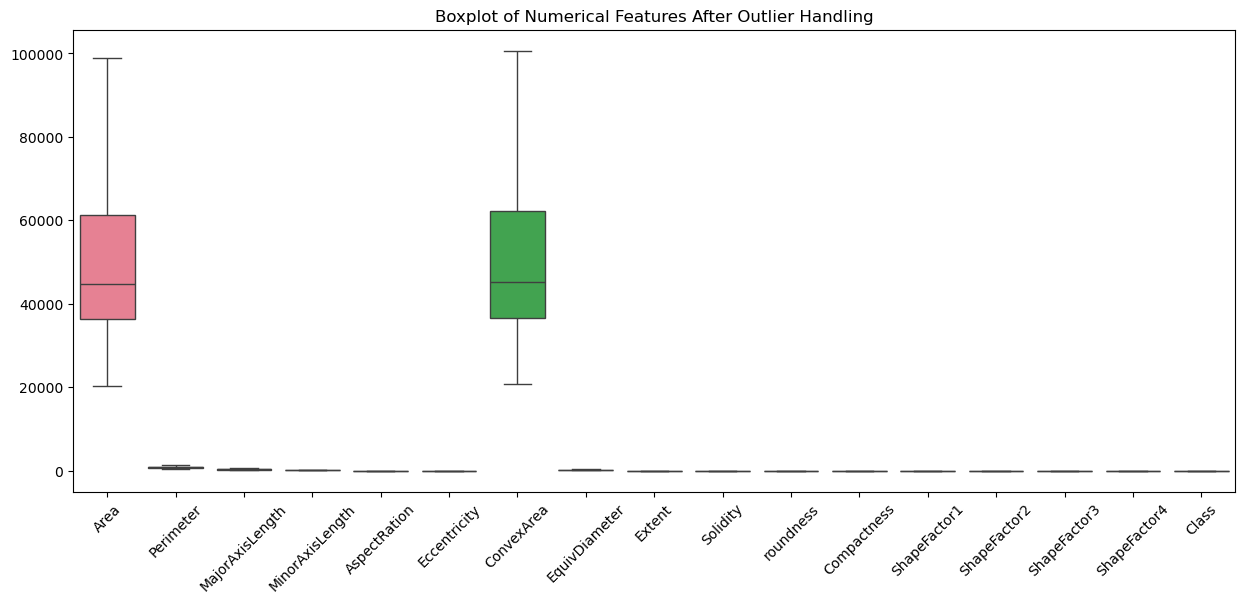

In [21]:
# Single Boxplot Visualization
plt.figure(figsize=(15, 6))
sns.boxplot(data=df1[numeric_cols])
plt.xticks(rotation=45)
plt.title("Boxplot of Numerical Features After Outlier Handling")
plt.show()

In [22]:
df1.shape

(13611, 17)

In [23]:
#Function to detect outliers using IQR

def detect_outliers_iqr(df1, threshold=1.5): 
    Q1 = df1.quantile(0.25) 
    Q3 = df1.quantile(0.75) 
    IQR = Q3 - Q1 
    outliers = ((df1 < (Q1 - threshold * IQR)) | (df1 > (Q3 + threshold * IQR))).sum() 
    return outliers

#Detect outliers before removal

outliers_after = detect_outliers_iqr(df1) 
print("Outliers after removal:\n", outliers_after)

Outliers after removal:
 Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64


<Figure size 1500x500 with 0 Axes>

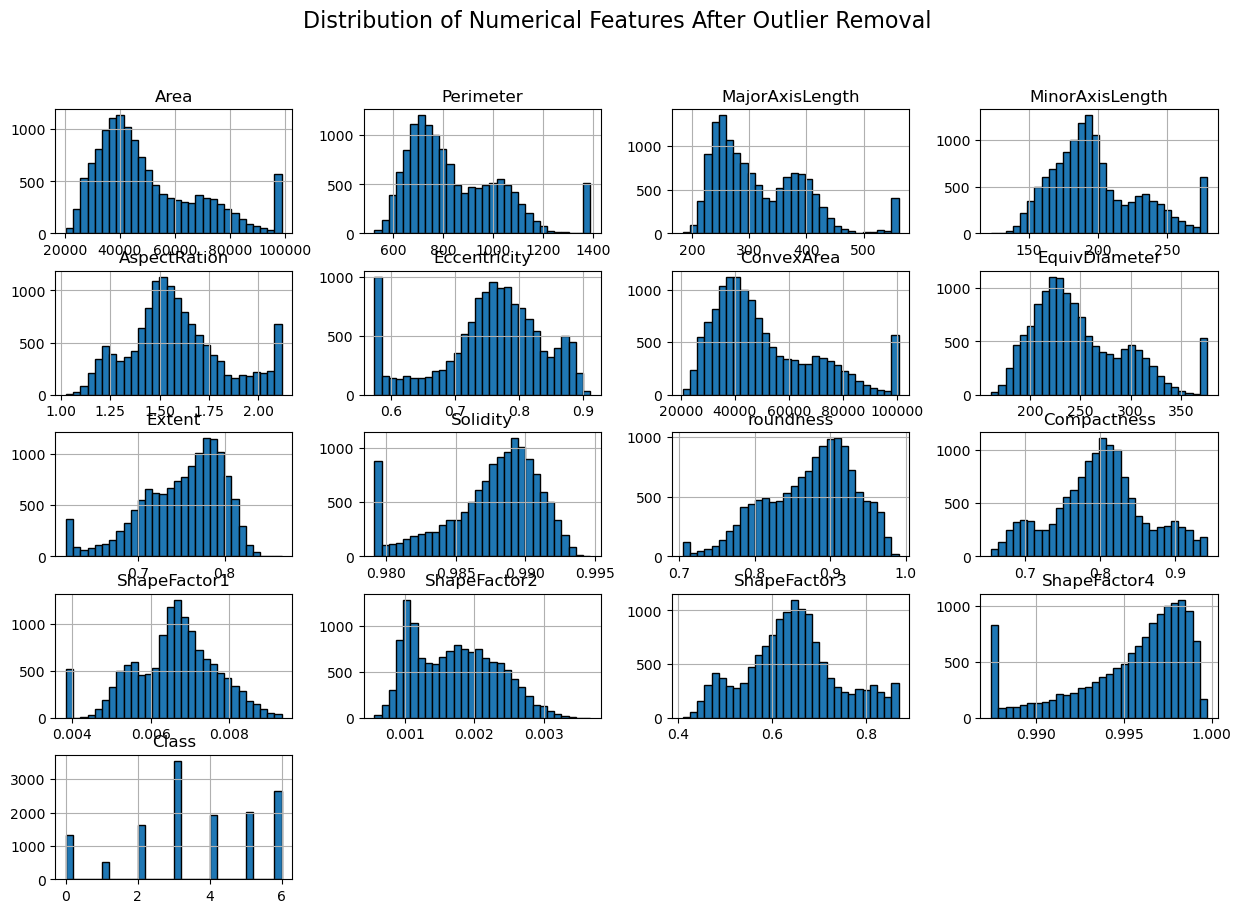

In [24]:
# Visualization
plt.figure(figsize=(15, 5))
# Histogram of numerical features
df1.hist(figsize=(15, 10), bins=30, edgecolor='black')
plt.suptitle("Distribution of Numerical Features After Outlier Removal", fontsize=16)
plt.show()

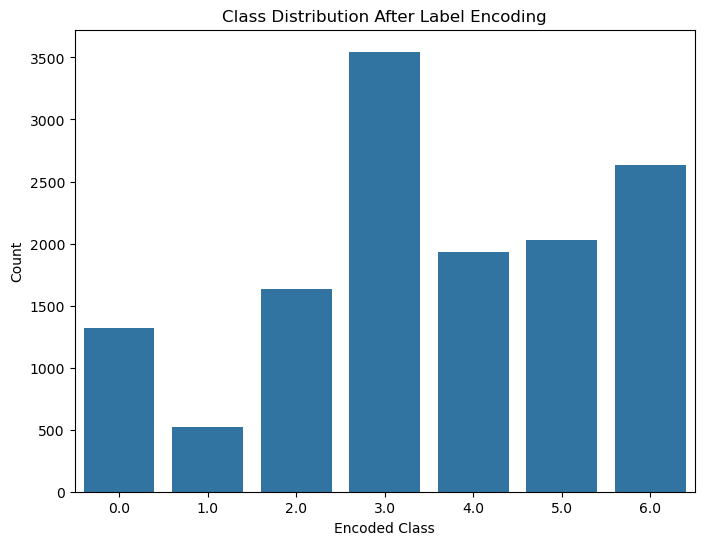

In [25]:
# Bar plot for 'Class' distribution
plt.figure(figsize=(8, 6))
sns.countplot(x=df1[class_col])
plt.title("Class Distribution After Label Encoding")
plt.xlabel("Encoded Class")
plt.ylabel("Count")
plt.show()

In [26]:
# Separate features and target
X = df1[numeric_cols]  
y = df1[class_col]               

In [27]:
# Apply StandardScaler
scaler_standard = StandardScaler()
X_standard_scaled = scaler_standard.fit_transform(X)
df_standard = pd.DataFrame(X_standard_scaled, columns=numeric_cols)


In [28]:
# Apply MinMaxScaler
scaler_minmax = MinMaxScaler()
X_minmax_scaled = scaler_minmax.fit_transform(X)
df_minmax = pd.DataFrame(X_minmax_scaled, columns=numeric_cols)


### Visualization of scaled data

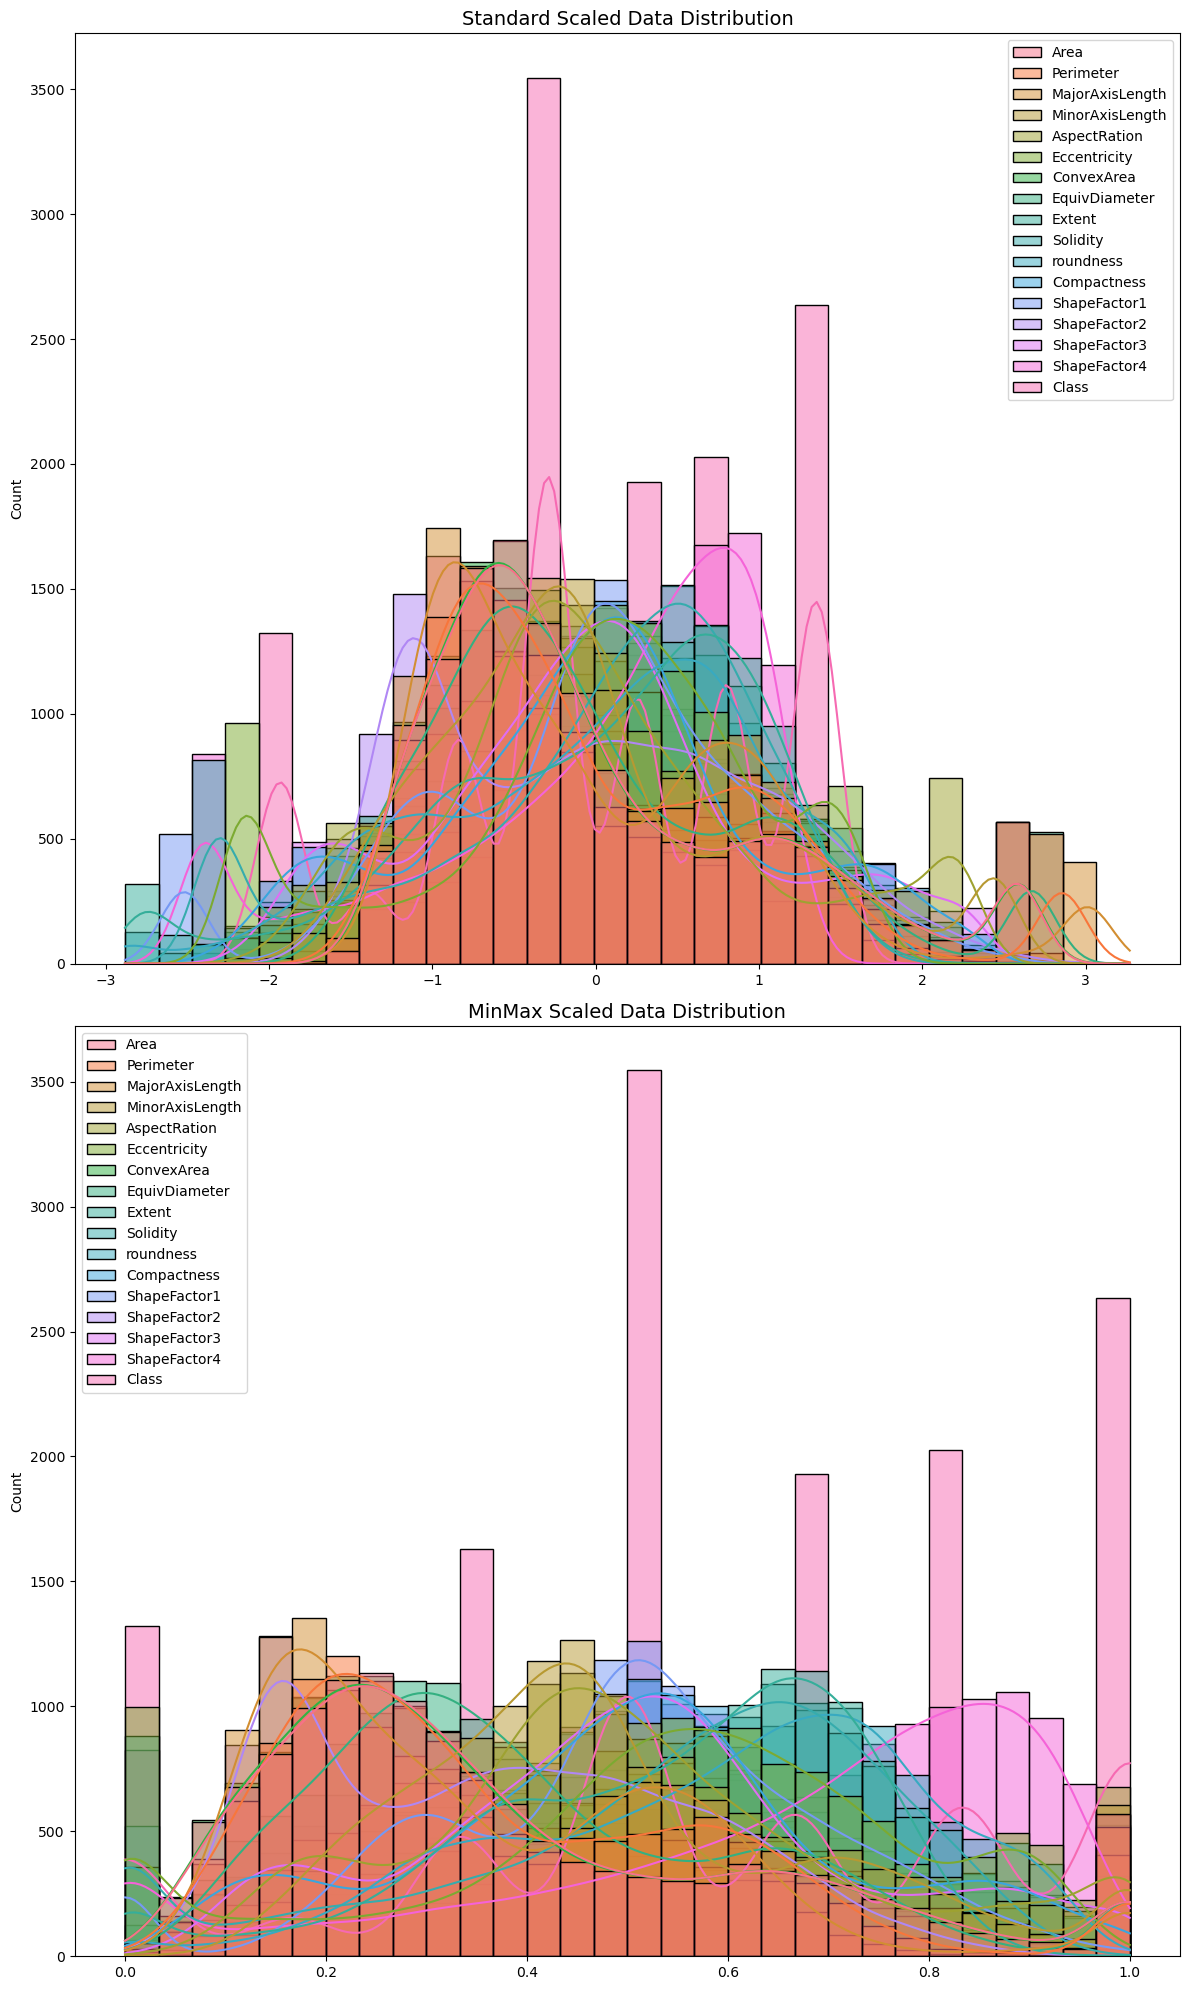

In [29]:
# 1 Histogram Comparison

fig, axes = plt.subplots(2, 1, figsize=(12, 20))

sns.histplot(data=df_standard, bins=30, kde=True, ax=axes[0], edgecolor='black')
axes[0].set_title("Standard Scaled Data Distribution", fontsize=14)

sns.histplot(data=df_minmax, bins=30, kde=True, ax=axes[1], edgecolor='black')
axes[1].set_title("MinMax Scaled Data Distribution", fontsize=14)

plt.tight_layout()
plt.show()

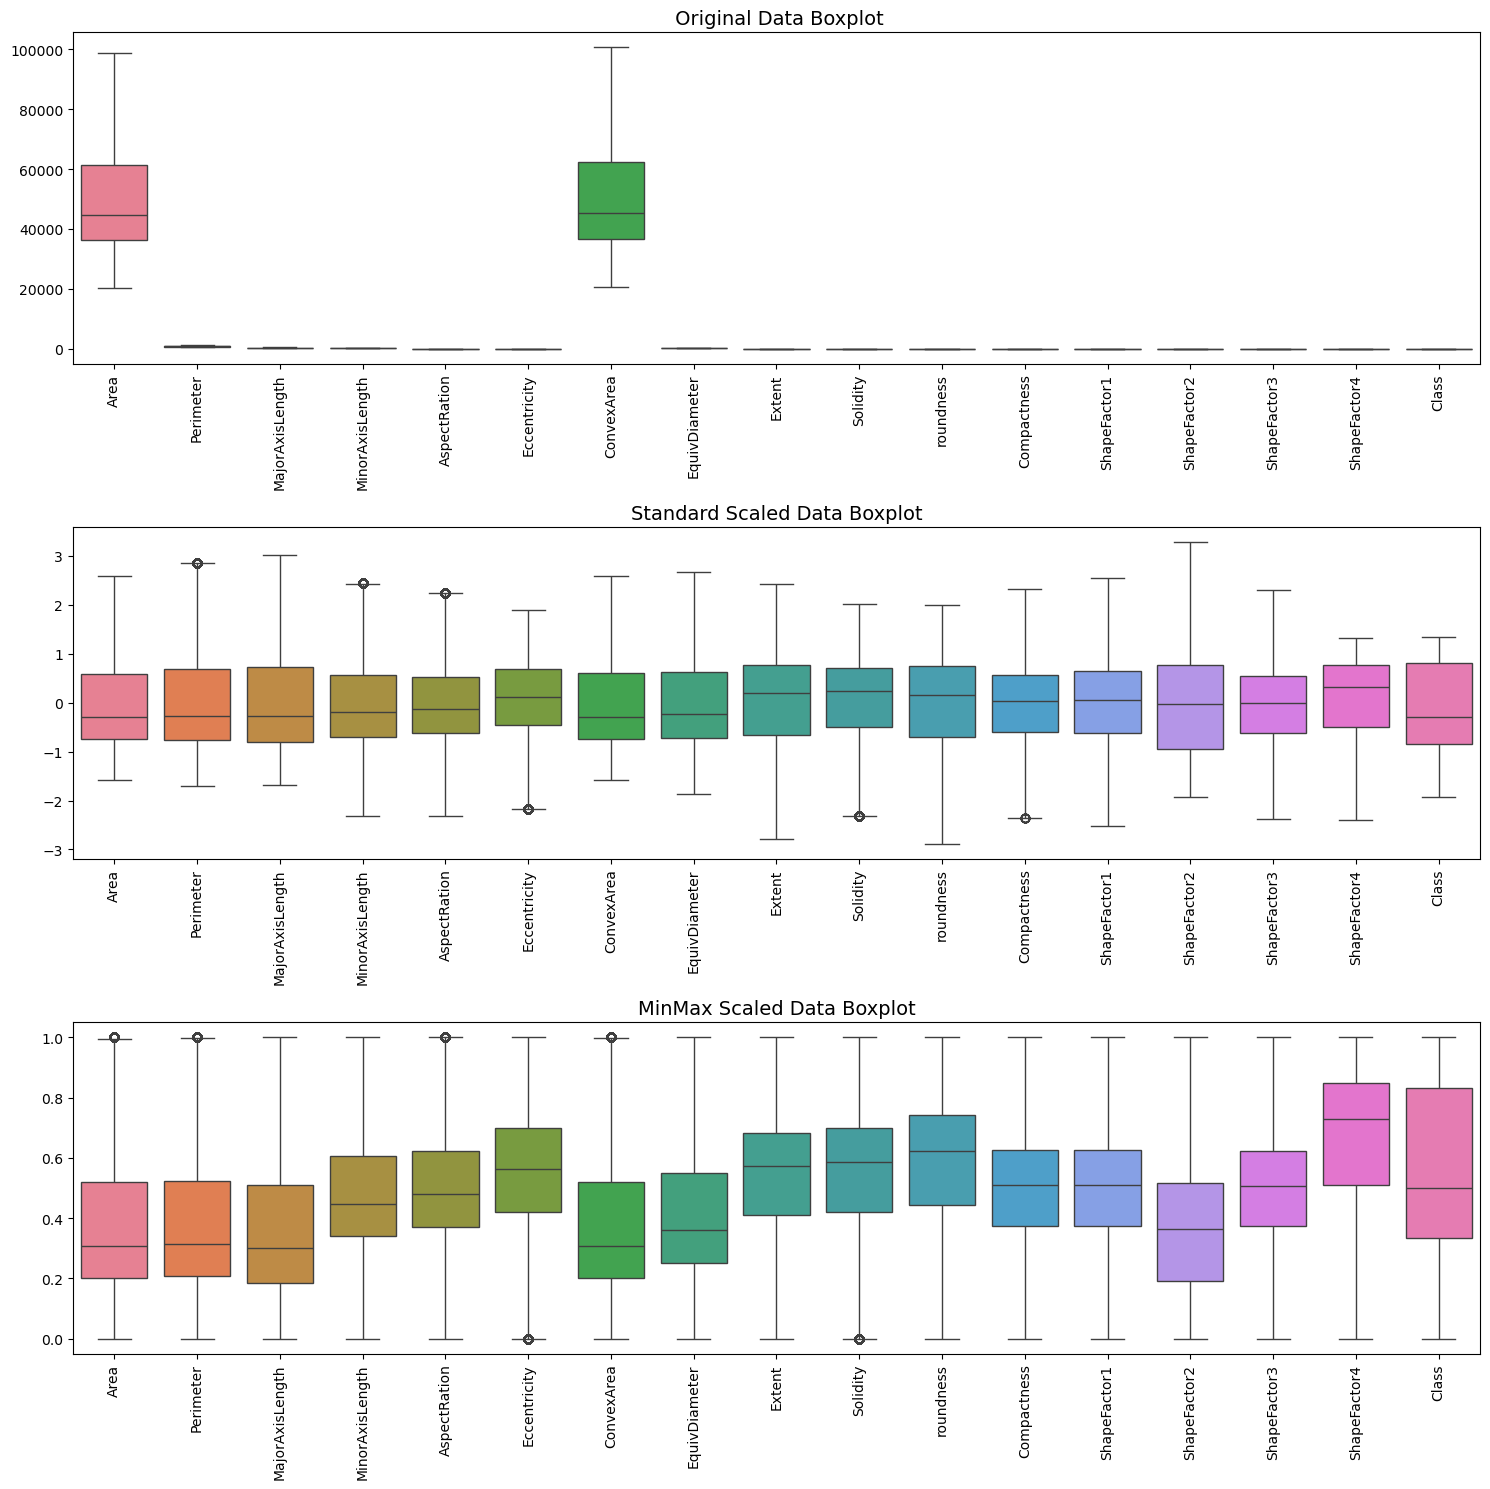

In [30]:
# 2️ Box Plot Comparison
fig, axes = plt.subplots(3, 1, figsize=(15, 15))

sns.boxplot(data=X, ax=axes[0])
axes[0].set_title(" Original Data Boxplot", fontsize=14)
axes[0].set_xticklabels(X.columns, rotation=90)

sns.boxplot(data=df_standard, ax=axes[1])
axes[1].set_title("Standard Scaled Data Boxplot", fontsize=14)
axes[1].set_xticklabels(X.columns, rotation=90)

sns.boxplot(data=df_minmax, ax=axes[2])
axes[2].set_title("MinMax Scaled Data Boxplot", fontsize=14)
axes[2].set_xticklabels(X.columns, rotation=90)

plt.tight_layout()
plt.show()

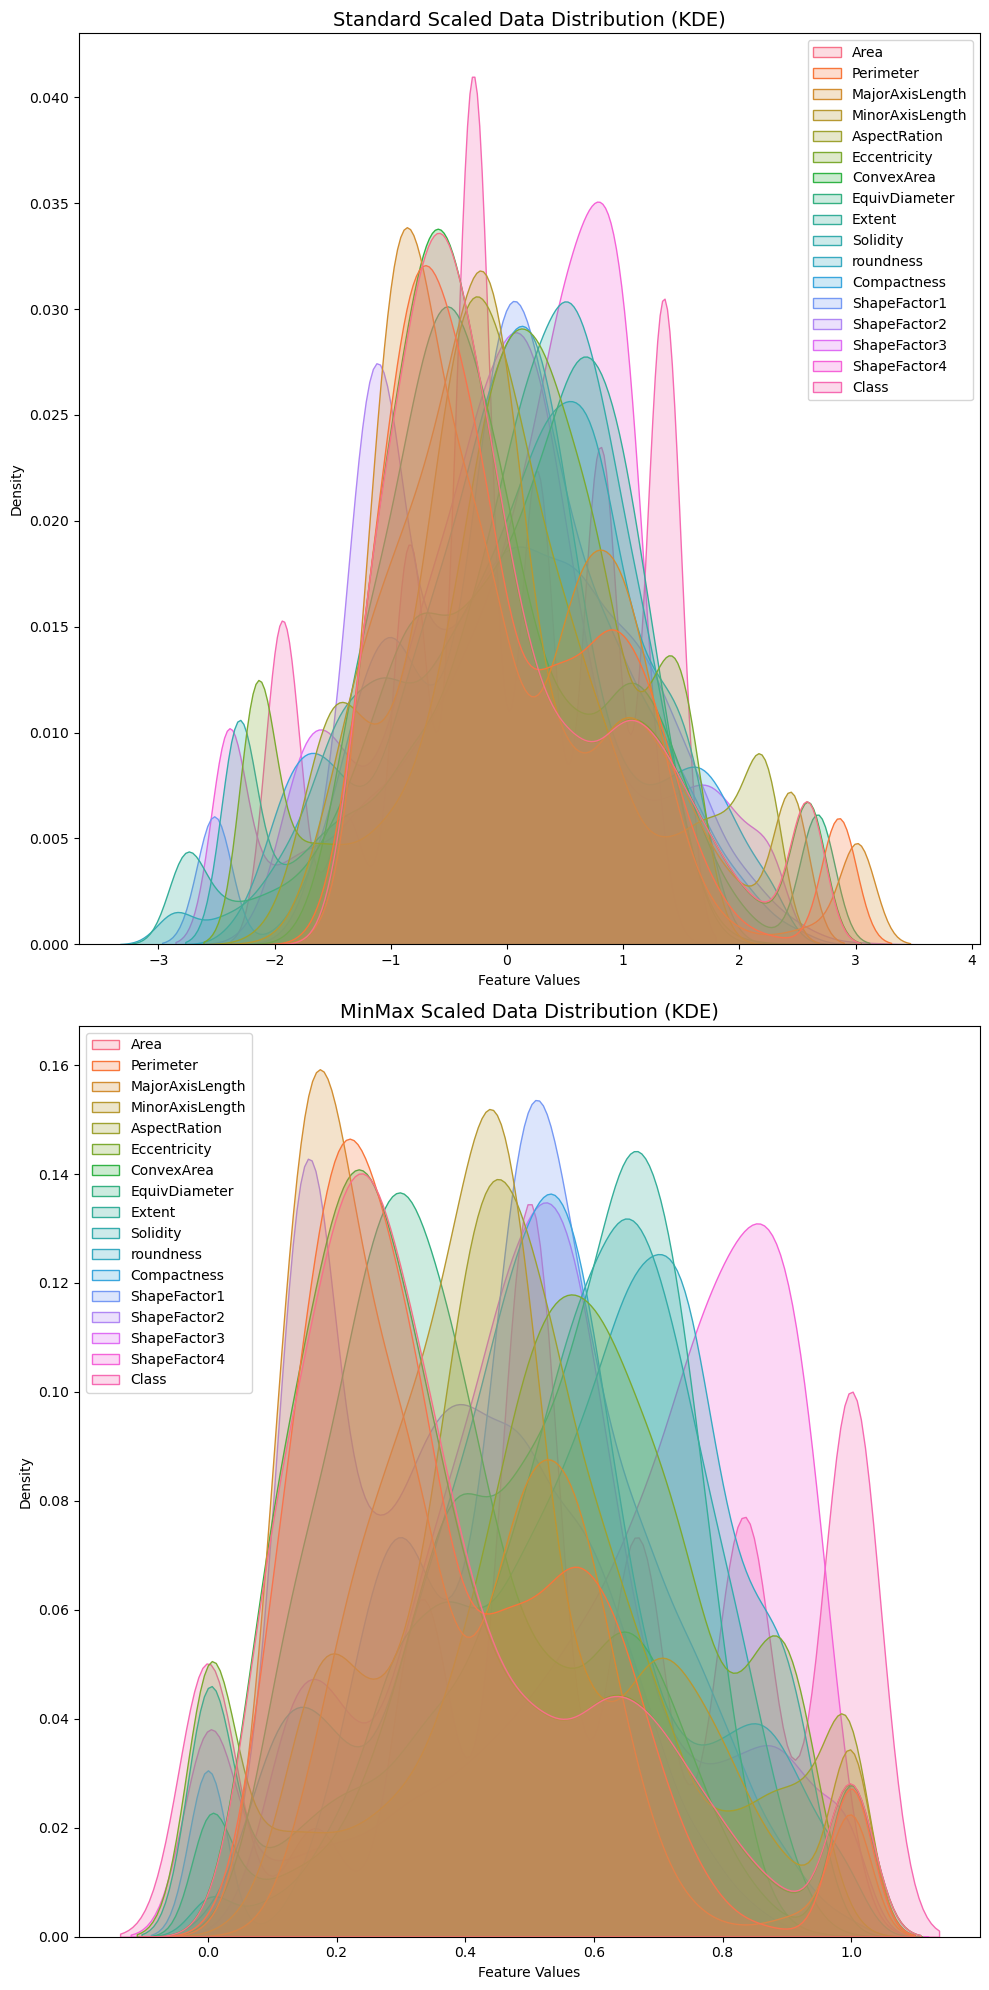

In [31]:
# KDE (Kernel Density Estimation) Plot for Comparison
fig, axes = plt.subplots(2, 1, figsize=(10, 20))

# Standard Scaled Data
sns.kdeplot(data=df_standard, fill=True, ax=axes[0])
axes[0].set_title("Standard Scaled Data Distribution (KDE)", fontsize=14)
axes[0].set_xlabel("Feature Values")
axes[0].set_ylabel("Density")

# MinMax Scaled Data
sns.kdeplot(data=df_minmax, fill=True, ax=axes[1])
axes[1].set_title("MinMax Scaled Data Distribution (KDE)", fontsize=14)
axes[1].set_xlabel("Feature Values")
axes[1].set_ylabel("Density")

plt.tight_layout()
plt.show()

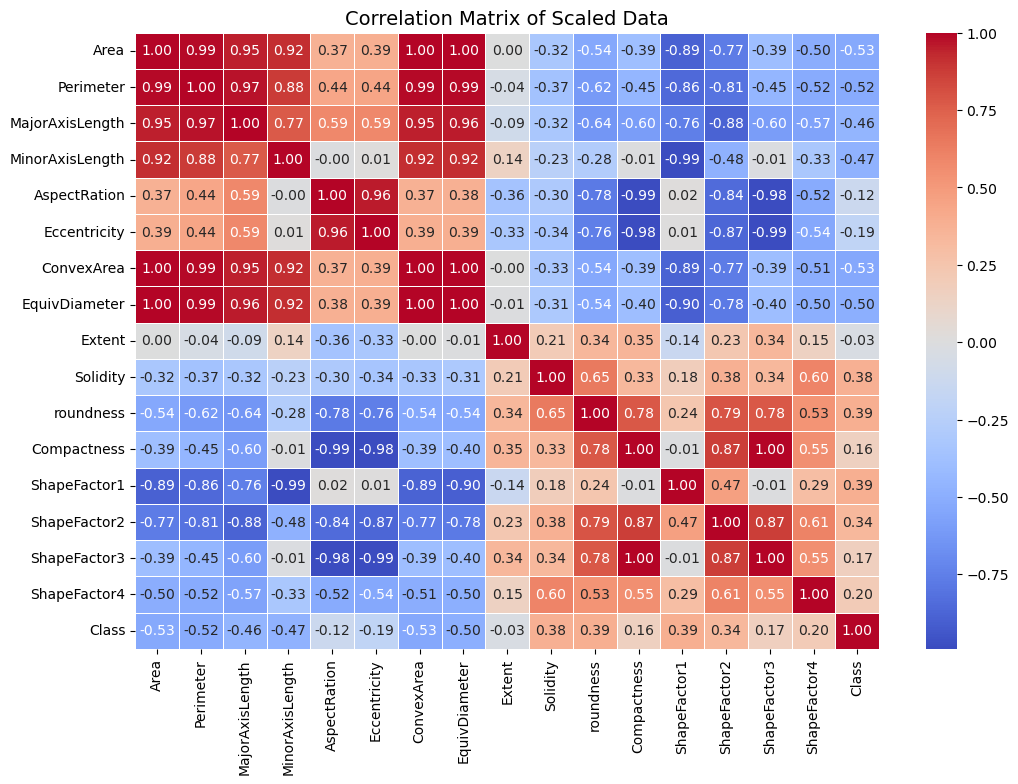

In [32]:
# 4. Compute correlation matrix
corr_matrix = df_standard.corr() 
plt.figure(figsize=(12, 8))

# Create heatmap
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Scaled Data", fontsize=14)
plt.show()

In [33]:
# Apply PCA on Standard Scaled Data
pca_standard = PCA(n_components=2)
X_pca_standard = pca_standard.fit_transform(X_standard_scaled)

# Apply PCA on MinMax Scaled Data
pca_minmax = PCA(n_components=2)
X_pca_minmax = pca_minmax.fit_transform(X_minmax_scaled)

# Convert PCA results to DataFrame
pca_standard_df = pd.DataFrame(X_pca_standard, columns=['PC1', 'PC2'])
pca_minmax_df = pd.DataFrame(X_pca_minmax, columns=['PC1', 'PC2'])
pca_standard_df['Class'] = y
pca_minmax_df['Class'] = y

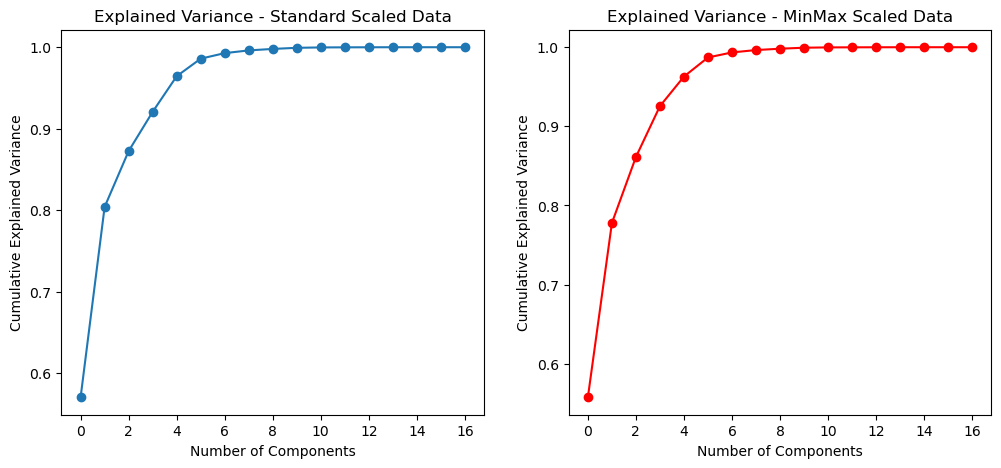

In [34]:
# Visualize PCA - Explained Variance
plt.figure(figsize=(12, 5))

# PCA Explained Variance for Standard Scaler
plt.subplot(1, 2, 1)
plt.plot(np.cumsum(PCA().fit(X_standard_scaled).explained_variance_ratio_), marker='o')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance - Standard Scaled Data")

# PCA Explained Variance for MinMax Scaler
plt.subplot(1, 2, 2)
plt.plot(np.cumsum(PCA().fit(X_minmax_scaled).explained_variance_ratio_), marker='o', color='red')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance - MinMax Scaled Data")

plt.show()


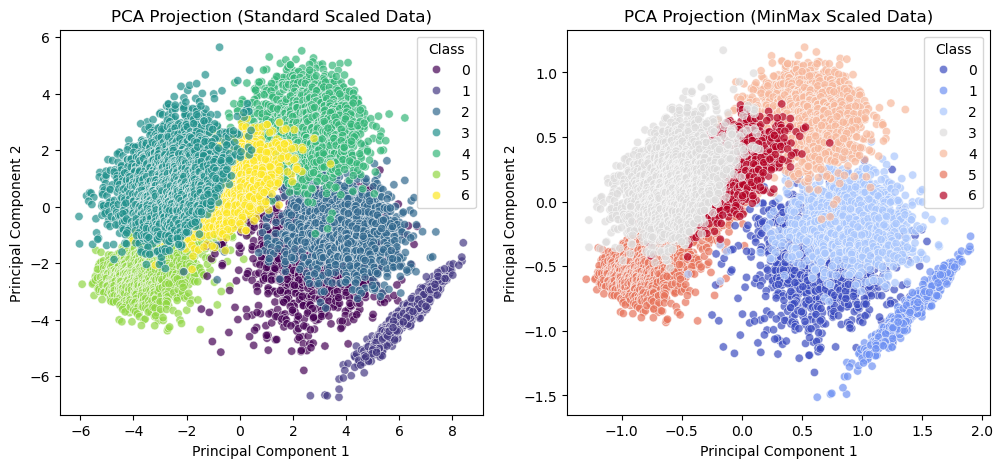

In [35]:
# Visualize PCA Scatter Plot
plt.figure(figsize=(12, 5))

# PCA Scatter for Standard Scaled Data
plt.subplot(1, 2, 1)
sns.scatterplot(x=pca_standard_df['PC1'], y=pca_standard_df['PC2'], hue=pca_standard_df['Class'], palette="viridis", alpha=0.7)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Projection (Standard Scaled Data)")

# PCA Scatter for MinMax Scaled Data
plt.subplot(1, 2, 2)
sns.scatterplot(x=pca_minmax_df['PC1'], y=pca_minmax_df['PC2'], hue=pca_minmax_df['Class'], palette="coolwarm", alpha=0.7)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Projection (MinMax Scaled Data)")

plt.show()

# Step 4: Train-Test Split

In [36]:
# Separate features and target
X = df1[numeric_cols]  
y = df1[class_col]               

In [37]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [38]:
# Display shapes of the resulting sets
print("Training Set Shape:", X_train.shape)
print("Testing Set Shape:", X_test.shape)

Training Set Shape: (10888, 17)
Testing Set Shape: (2723, 17)


#### Bar Plot for Feature Mean Comparison

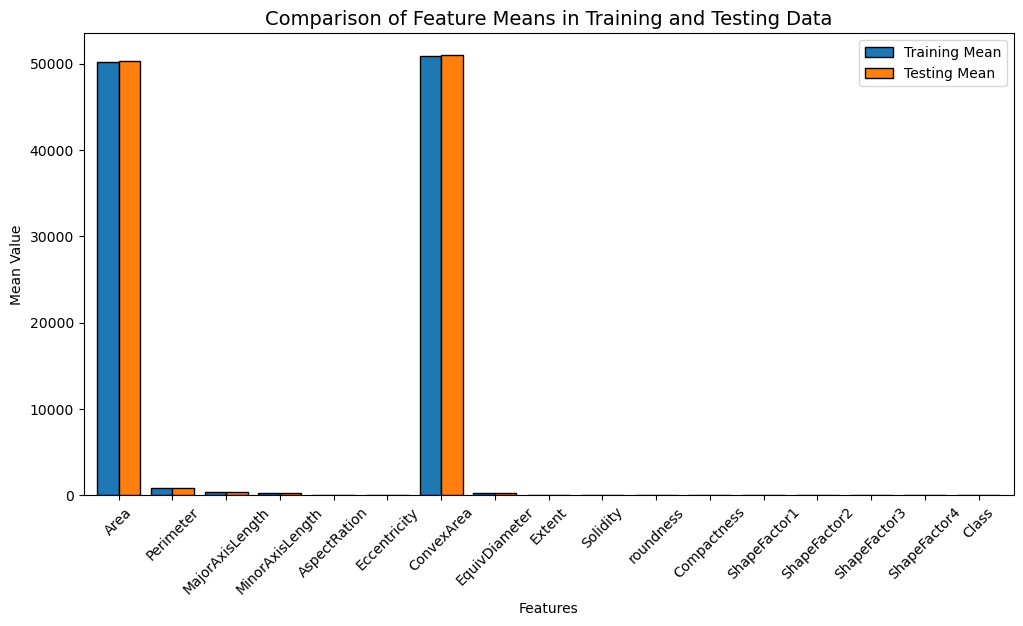

In [39]:
# Compute mean values for features in train and test sets
train_mean = X_train.mean()
test_mean = X_test.mean()

# Create a DataFrame for better visualization
df_mean = pd.DataFrame({'Training Mean': train_mean, 'Testing Mean': test_mean})

# Plot bar chart
df_mean.plot(kind='bar', figsize=(12, 6), width=0.8, edgecolor='black')
plt.title("Comparison of Feature Means in Training and Testing Data", fontsize=14)
plt.ylabel("Mean Value")
plt.xlabel("Features")
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [40]:
# Apply PCA (2 components for visualization)
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)


# Convert PCA results to DataFrame
df_train_pca = pd.DataFrame(X_train_pca, columns=["PCA1", "PCA2"])
df_train_pca["Class"] = y_train.values 

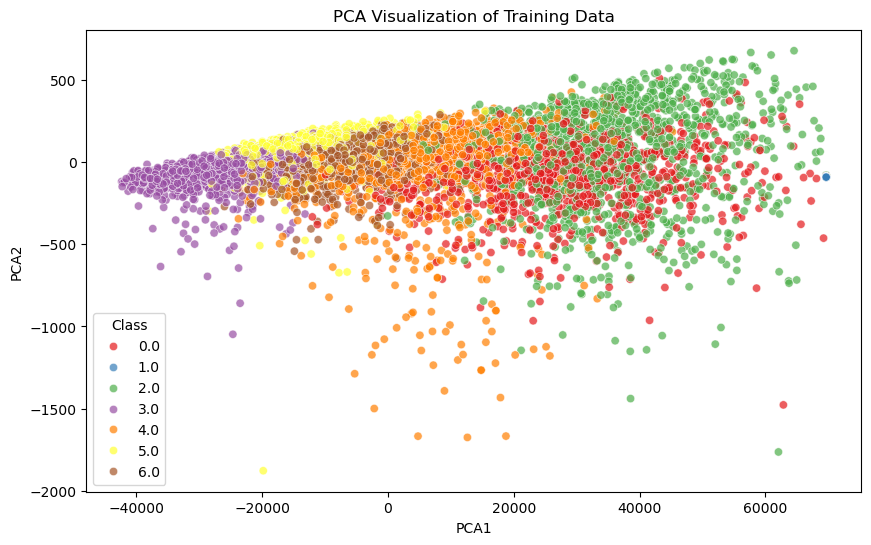

In [41]:
# Scatter plot of PCA results
plt.figure(figsize=(10, 6))
sns.scatterplot(x="PCA1", y="PCA2", hue="Class", data=df_train_pca, palette="Set1", alpha=0.7)
plt.title("PCA Visualization of Training Data")
plt.show()

# Step 5: Model Selection & Training 

### LOGISTIC REGRESSION USING PCA

In [42]:
# Apply PCA (10 components for better classification)
pca = PCA(n_components=10)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Train Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_pca, y_train)
y_pred_log = log_reg.predict(X_test_pca)

# Evaluation
print("LOGISTIC REGRESSION USING PCA\n")
print(f"Accuracy (PCA): {accuracy_score(y_test, y_pred_log):.4f}\n")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_log))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_log))

LOGISTIC REGRESSION USING PCA

Accuracy (PCA): 0.8579

Confusion Matrix:
[[216   7  29   1   4   6   2]
 [  7  97   0   0   0   0   0]
 [  9   7 303   0   5   2   0]
 [  0   0   0 660   0  15  34]
 [  3   2   3   9 359   0  10]
 [  0   0   1   9   0 391   5]
 [  2   1  13 103  33  65 310]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.91      0.82      0.86       265
         1.0       0.85      0.93      0.89       104
         2.0       0.87      0.93      0.90       326
         3.0       0.84      0.93      0.89       709
         4.0       0.90      0.93      0.91       386
         5.0       0.82      0.96      0.88       406
         6.0       0.86      0.59      0.70       527

    accuracy                           0.86      2723
   macro avg       0.86      0.87      0.86      2723
weighted avg       0.86      0.86      0.85      2723



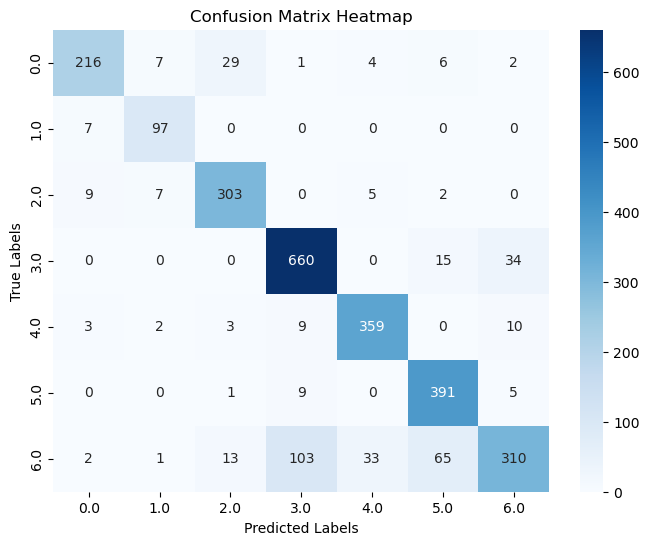

In [43]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_log)

# Plot confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=set(y_test), yticklabels=set(y_test))
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix Heatmap")
plt.show()

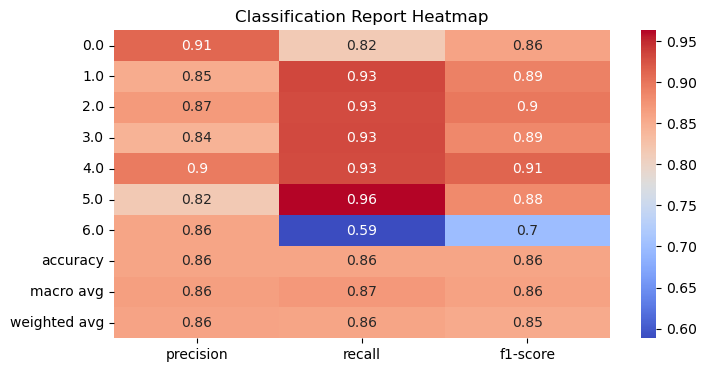

In [44]:
# Generate classification report
report = classification_report(y_test, y_pred_log, output_dict=True)

# Convert to DataFrame and plot as heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(pd.DataFrame(report).iloc[:-1, :].T, annot=True, cmap="coolwarm")
plt.title("Classification Report Heatmap")
plt.show()

### LOGISTIC REGRESSION WITHOUT USING PCA

In [45]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)

# Evaluation
print("Logistic Regression:")
print("Accuracy_orginal:", accuracy_score(y_test, y_pred_log))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log))
print("Classification Report:\n", classification_report(y_test, y_pred_log))

Logistic Regression:
Accuracy_orginal: 0.8894601542416453
Confusion Matrix:
 [[216   0  31   0   3   3  12]
 [  5  98   1   0   0   0   0]
 [ 21   4 292   0   7   1   1]
 [  0   0   0 626   0  12  71]
 [  3   0   3  11 363   0   6]
 [  5   0   0   8   0 379  14]
 [  5   0   1  45  13  15 448]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.85      0.82      0.83       265
         1.0       0.96      0.94      0.95       104
         2.0       0.89      0.90      0.89       326
         3.0       0.91      0.88      0.89       709
         4.0       0.94      0.94      0.94       386
         5.0       0.92      0.93      0.93       406
         6.0       0.81      0.85      0.83       527

    accuracy                           0.89      2723
   macro avg       0.90      0.89      0.90      2723
weighted avg       0.89      0.89      0.89      2723



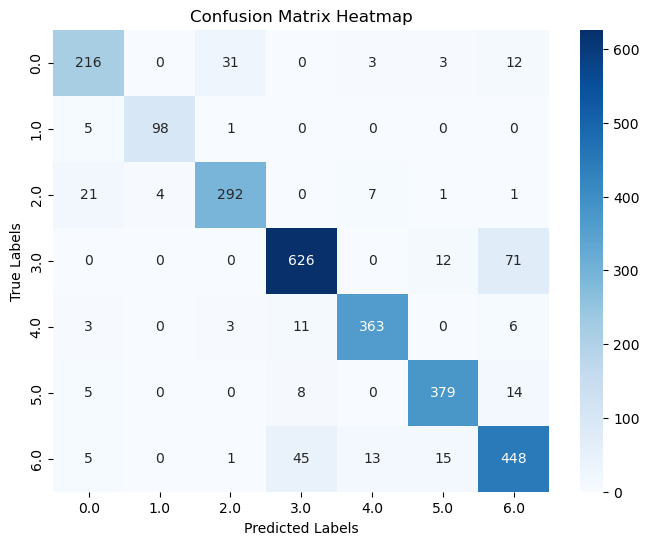

In [46]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_log)

# Plot confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=set(y_test), yticklabels=set(y_test))
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix Heatmap")
plt.show()

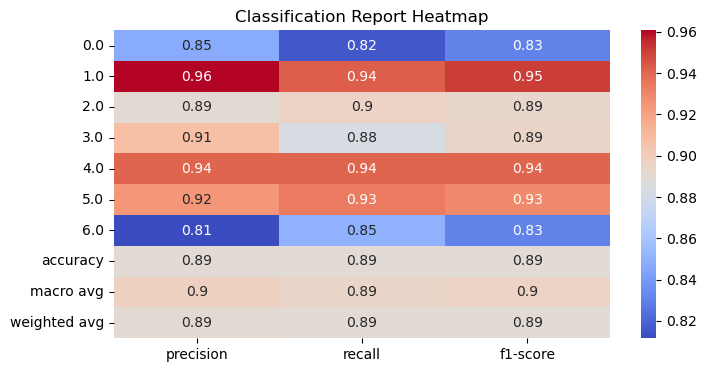

In [47]:
# Generate classification report
report = classification_report(y_test, y_pred_log, output_dict=True)

# Convert to DataFrame and plot as heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(pd.DataFrame(report).iloc[:-1, :].T, annot=True, cmap="coolwarm")
plt.title("Classification Report Heatmap")
plt.show()

### RandomForestClassifier Using PCA

In [48]:
# Apply PCA (10 components for better classification)
pca = PCA(n_components=10)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Evaluation
print("RANDOM FOREST CLASSIFIER USING PCA\n")
print(f"Accuracy (PCA): {accuracy_score(y_test, y_pred_rf):.4f}\n")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

RANDOM FOREST CLASSIFIER USING PCA

Accuracy (PCA): 0.9993

Confusion Matrix:
[[264   0   0   1   0   0   0]
 [  0 104   0   0   0   0   0]
 [  0   0 325   1   0   0   0]
 [  0   0   0 709   0   0   0]
 [  0   0   0   0 386   0   0]
 [  0   0   0   0   0 406   0]
 [  0   0   0   0   0   0 527]]

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       265
         1.0       1.00      1.00      1.00       104
         2.0       1.00      1.00      1.00       326
         3.0       1.00      1.00      1.00       709
         4.0       1.00      1.00      1.00       386
         5.0       1.00      1.00      1.00       406
         6.0       1.00      1.00      1.00       527

    accuracy                           1.00      2723
   macro avg       1.00      1.00      1.00      2723
weighted avg       1.00      1.00      1.00      2723



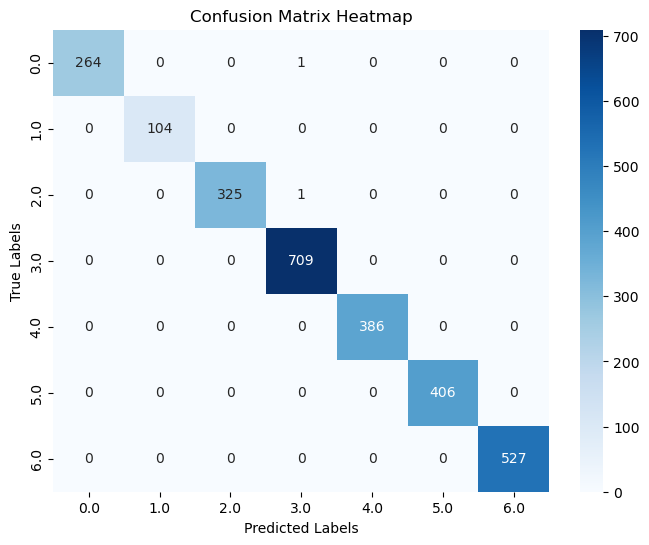

In [49]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)

# Plot confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=set(y_test), yticklabels=set(y_test))
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix Heatmap")
plt.show()

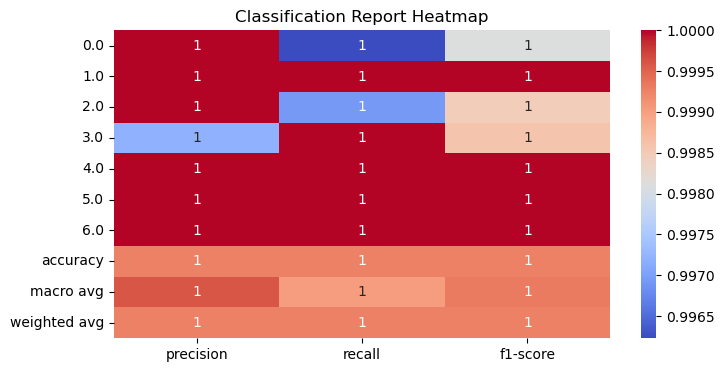

In [50]:
# Generate classification report
report = classification_report(y_test, y_pred_rf, output_dict=True)

# Convert to DataFrame and plot as heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(pd.DataFrame(report).iloc[:-1, :].T, annot=True, cmap="coolwarm")
plt.title("Classification Report Heatmap")
plt.show()

### RandomForestClassifier Without Using PCA

In [51]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Evaluation
print(" Random Forest:")
print("Accuracy_orginal:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

 Random Forest:
Accuracy_orginal: 0.9992655159750276
Confusion Matrix:
 [[264   0   0   1   0   0   0]
 [  0 104   0   0   0   0   0]
 [  0   0 325   1   0   0   0]
 [  0   0   0 709   0   0   0]
 [  0   0   0   0 386   0   0]
 [  0   0   0   0   0 406   0]
 [  0   0   0   0   0   0 527]]
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       265
         1.0       1.00      1.00      1.00       104
         2.0       1.00      1.00      1.00       326
         3.0       1.00      1.00      1.00       709
         4.0       1.00      1.00      1.00       386
         5.0       1.00      1.00      1.00       406
         6.0       1.00      1.00      1.00       527

    accuracy                           1.00      2723
   macro avg       1.00      1.00      1.00      2723
weighted avg       1.00      1.00      1.00      2723



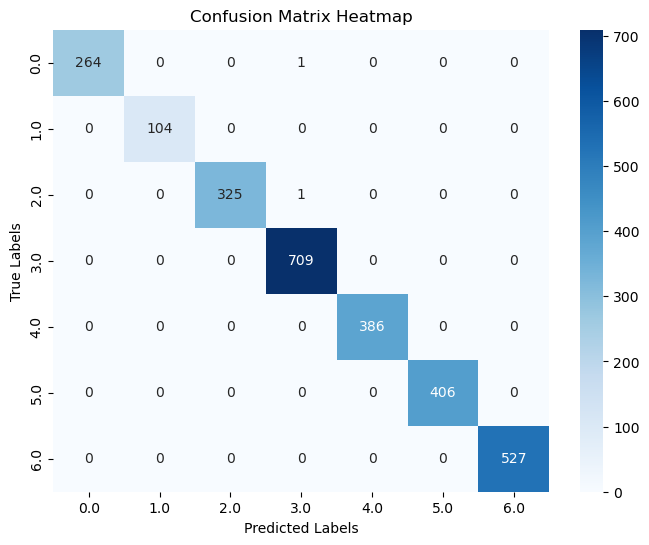

In [52]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)

# Plot confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=set(y_test), yticklabels=set(y_test))
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix Heatmap")
plt.show()

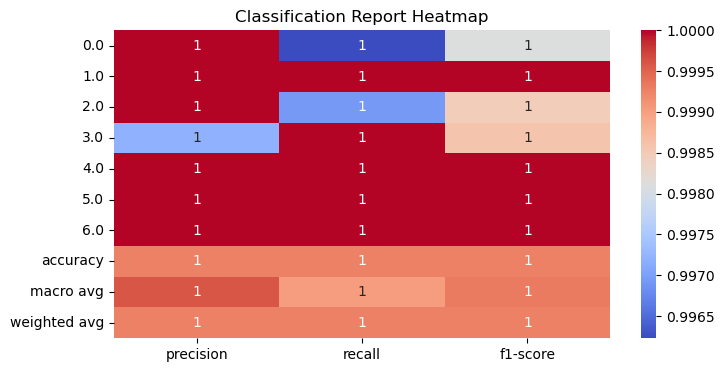

In [53]:
# Generate classification report
report = classification_report(y_test, y_pred_rf, output_dict=True)

# Convert to DataFrame and plot as heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(pd.DataFrame(report).iloc[:-1, :].T, annot=True, cmap="coolwarm")
plt.title("Classification Report Heatmap")
plt.show()

### SVC USING PCA

In [54]:
# Apply PCA (10 components for better classification)
pca = PCA(n_components=10)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

svm = SVC(kernel='rbf')
svm.fit(X_train_pca, y_train)
y_pred_svm = svm.predict(X_test_pca)

# Evaluation
print("SVM USING PCA\n")
print(f"Accuracy (PCA): {accuracy_score(y_test, y_pred_svm):.4f}\n")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_svm))

SVM USING PCA

Accuracy (PCA): 0.6346

Confusion Matrix:
[[ 22   0 178   0  54   0  11]
 [  0 104   0   0   0   0   0]
 [  5   6 285   0  29   0   1]
 [  0   0   0 602   0  59  48]
 [  9   0  15   8 230   8 116]
 [  0   0   0 150   9  74 173]
 [  0   0   0  31  38  47 411]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.61      0.08      0.15       265
         1.0       0.95      1.00      0.97       104
         2.0       0.60      0.87      0.71       326
         3.0       0.76      0.85      0.80       709
         4.0       0.64      0.60      0.62       386
         5.0       0.39      0.18      0.25       406
         6.0       0.54      0.78      0.64       527

    accuracy                           0.63      2723
   macro avg       0.64      0.62      0.59      2723
weighted avg       0.62      0.63      0.59      2723



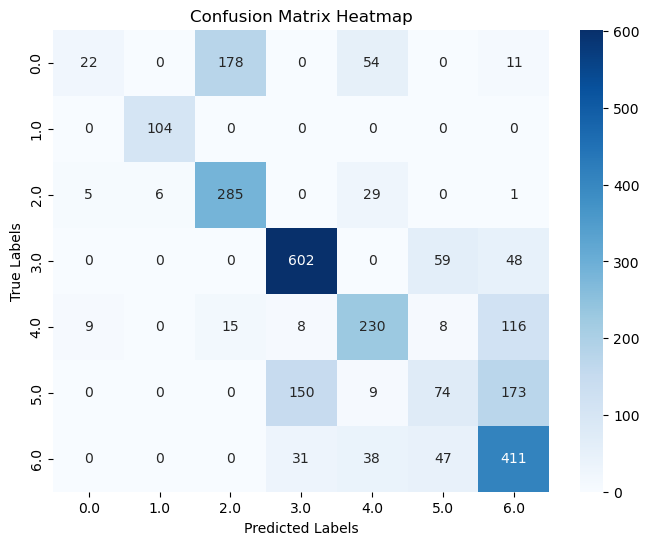

In [55]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_svm)

# Plot confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=set(y_test), yticklabels=set(y_test))
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix Heatmap")
plt.show()

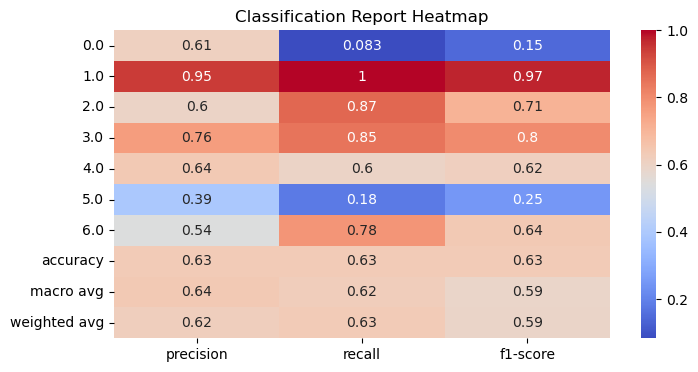

In [56]:
# Generate classification report
report = classification_report(y_test, y_pred_svm, output_dict=True)

# Convert to DataFrame and plot as heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(pd.DataFrame(report).iloc[:-1, :].T, annot=True, cmap="coolwarm")
plt.title("Classification Report Heatmap")
plt.show()

### SVC WITHOUT USING PCA

In [57]:
svm = SVC(kernel='rbf')
svm.fit(X_train_pca, y_train)
y_pred_svm = svm.predict(X_test_pca)

# Evaluation
print("SVM:")
print("Accuracy_orginal:", accuracy_score(y_test, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))

SVM:
Accuracy_orginal: 0.6345941975762027
Confusion Matrix:
 [[ 22   0 178   0  54   0  11]
 [  0 104   0   0   0   0   0]
 [  5   6 285   0  29   0   1]
 [  0   0   0 602   0  59  48]
 [  9   0  15   8 230   8 116]
 [  0   0   0 150   9  74 173]
 [  0   0   0  31  38  47 411]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.61      0.08      0.15       265
         1.0       0.95      1.00      0.97       104
         2.0       0.60      0.87      0.71       326
         3.0       0.76      0.85      0.80       709
         4.0       0.64      0.60      0.62       386
         5.0       0.39      0.18      0.25       406
         6.0       0.54      0.78      0.64       527

    accuracy                           0.63      2723
   macro avg       0.64      0.62      0.59      2723
weighted avg       0.62      0.63      0.59      2723



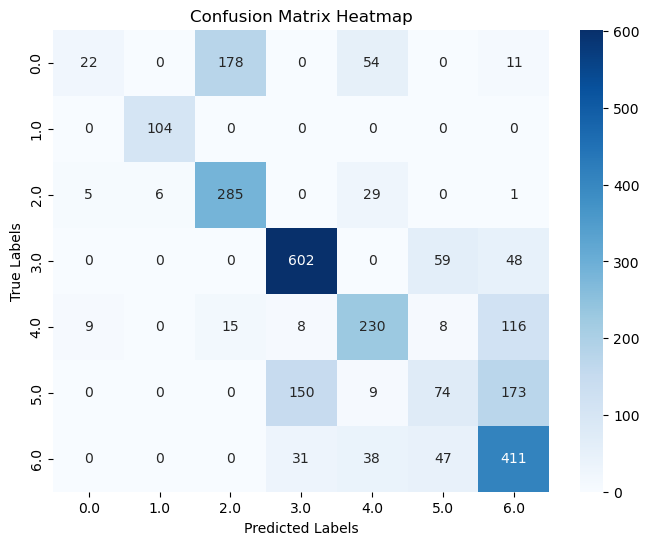

In [58]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_svm)

# Plot confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=set(y_test), yticklabels=set(y_test))
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix Heatmap")
plt.show()

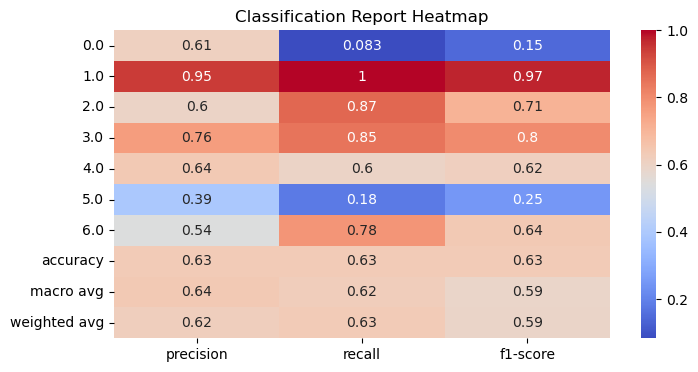

In [59]:
# Generate classification report
report = classification_report(y_test, y_pred_svm, output_dict=True)

# Convert to DataFrame and plot as heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(pd.DataFrame(report).iloc[:-1, :].T, annot=True, cmap="coolwarm")
plt.title("Classification Report Heatmap")
plt.show()

### KNeighborsClassifier Using PCA

In [60]:
# Apply PCA (10 components for better classification)
pca = PCA(n_components=10)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_pca, y_train)
y_pred_knn = knn.predict(X_test_pca)

# Evaluation
print("KNN USING PCA\n")
print(f"Accuracy (PCA): {accuracy_score(y_test, y_pred_knn):.4f}\n")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_knn))

KNN USING PCA

Accuracy (PCA): 0.7246

Confusion Matrix:
[[135   0  96   0  23   0  11]
 [  0 104   0   0   0   0   0]
 [ 93   0 215   0  17   1   0]
 [  0   0   0 634   0  40  35]
 [ 32   0  15  13 264   2  60]
 [  1   0   0  69   5 243  88]
 [  1   0   1  69  42  36 378]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.52      0.51      0.51       265
         1.0       1.00      1.00      1.00       104
         2.0       0.66      0.66      0.66       326
         3.0       0.81      0.89      0.85       709
         4.0       0.75      0.68      0.72       386
         5.0       0.75      0.60      0.67       406
         6.0       0.66      0.72      0.69       527

    accuracy                           0.72      2723
   macro avg       0.74      0.72      0.73      2723
weighted avg       0.72      0.72      0.72      2723



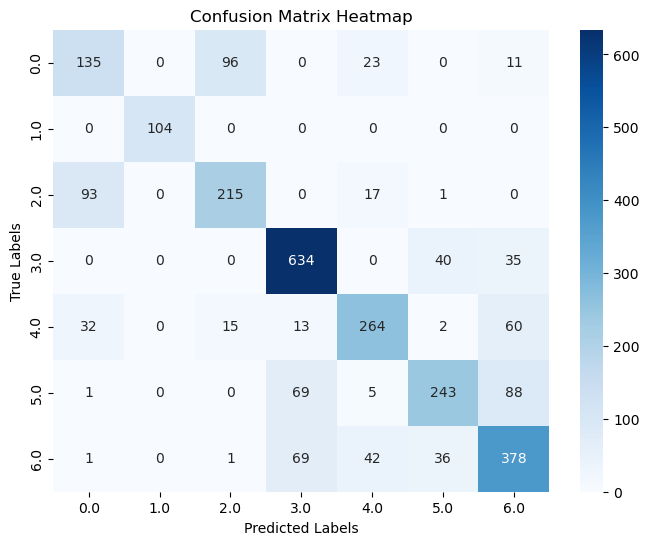

In [61]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_knn)

# Plot confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=set(y_test), yticklabels=set(y_test))
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix Heatmap")
plt.show()

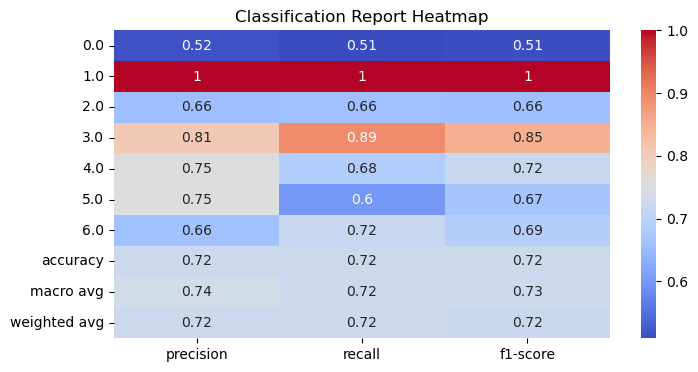

In [62]:
# Generate classification report
report = classification_report(y_test, y_pred_knn, output_dict=True)

# Convert to DataFrame and plot as heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(pd.DataFrame(report).iloc[:-1, :].T, annot=True, cmap="coolwarm")
plt.title("Classification Report Heatmap")
plt.show()

### KNeighborsClassifier  Without Using PCA

In [63]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

# Evaluation
print("KNN:")
print("Accuracy_orginal:", accuracy_score(y_test, y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))
print("Classification Report:\n", classification_report(y_test, y_pred_knn))

KNN:
Accuracy_orginal: 0.7245684906353287
Confusion Matrix:
 [[135   0  96   0  23   0  11]
 [  0 104   0   0   0   0   0]
 [ 93   0 215   0  17   1   0]
 [  0   0   0 634   0  40  35]
 [ 32   0  15  13 264   2  60]
 [  1   0   0  69   5 243  88]
 [  1   0   1  69  42  36 378]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.52      0.51      0.51       265
         1.0       1.00      1.00      1.00       104
         2.0       0.66      0.66      0.66       326
         3.0       0.81      0.89      0.85       709
         4.0       0.75      0.68      0.72       386
         5.0       0.75      0.60      0.67       406
         6.0       0.66      0.72      0.69       527

    accuracy                           0.72      2723
   macro avg       0.74      0.72      0.73      2723
weighted avg       0.72      0.72      0.72      2723



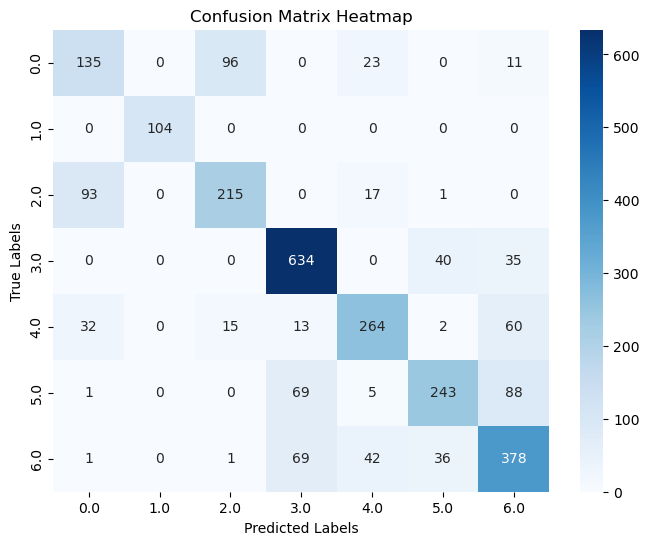

In [64]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_knn)

# Plot confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=set(y_test), yticklabels=set(y_test))
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix Heatmap")
plt.show()

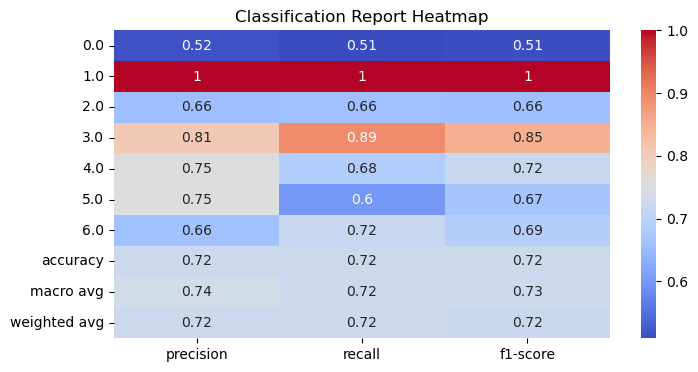

In [65]:
# Generate classification report
report = classification_report(y_test, y_pred_knn, output_dict=True)

# Convert to DataFrame and plot as heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(pd.DataFrame(report).iloc[:-1, :].T, annot=True, cmap="coolwarm")
plt.title("Classification Report Heatmap")
plt.show()

# Step 6: Model Evaluation & Comparison

## USING PCA

In [66]:
# Store results in a dictionary
results = {
    "Logistic Regression": accuracy_score(y_test, y_pred_log),
    "Random Forest": accuracy_score(y_test, y_pred_rf),
    "SVM": accuracy_score(y_test, y_pred_svm),
    "KNN": accuracy_score(y_test, y_pred_knn),
    
}

In [67]:
# Convert results to DataFrame
Accuracy_pca= pd.DataFrame(list(results.items()), columns=["Model", "Accuracy_pca"])

# Sort by accuracy
Accuracy_pca= Accuracy_pca.sort_values(by="Accuracy_pca")
print (Accuracy_pca)

                 Model  Accuracy_pca
2                  SVM      0.634594
3                  KNN      0.724568
0  Logistic Regression      0.889460
1        Random Forest      0.999266


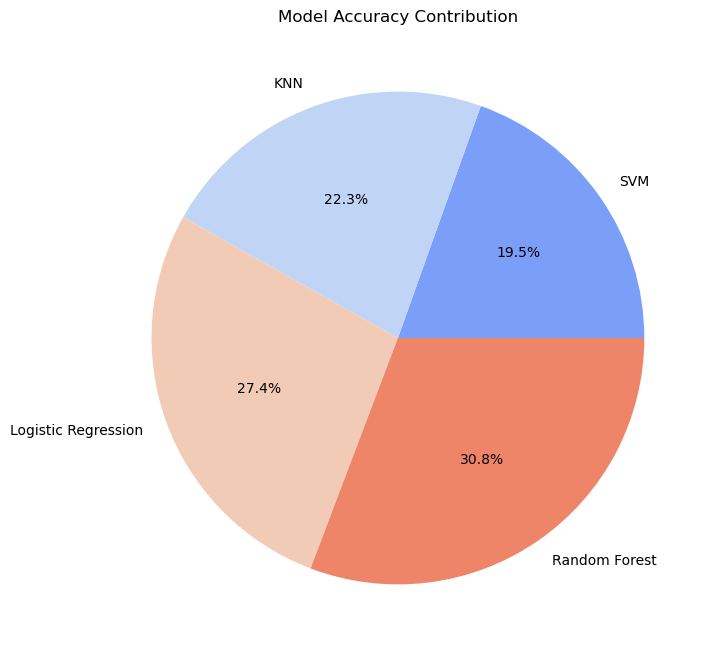

In [68]:
# Visualization for Comparing Accuracy

plt.figure(figsize=(8, 8))
plt.pie(Accuracy_pca["Accuracy_pca"], labels=Accuracy_pca["Model"], autopct="%1.1f%%", colors=sns.color_palette("coolwarm", len(Accuracy_pca)))
plt.title("Model Accuracy Contribution")
plt.show()

In [69]:
# Display the best model by sorting the dataframe
best_model = Accuracy_pca.loc[Accuracy_pca['Accuracy_pca'].idxmax()]
print(f"Best Model: {best_model['Model']} with Accuracy using pca: {best_model['Accuracy_pca']}")

Best Model: Random Forest with Accuracy using pca: 0.9992655159750276


## Without Using PCA

In [70]:
# Store results in a dictionary
results = {
    "Logistic Regression": accuracy_score(y_test, y_pred_log),
    "Random Forest": accuracy_score(y_test, y_pred_rf),
    "SVM": accuracy_score(y_test, y_pred_svm),
    "KNN": accuracy_score(y_test, y_pred_knn),
    
}

In [71]:
# Convert results to DataFrame
Accuracy_orginal = pd.DataFrame(list(results.items()), columns=["Model", "Accuracy_orginal"])

# Sort by accuracy
Accuracy_orginal = Accuracy_orginal.sort_values(by="Accuracy_orginal")
print (Accuracy_orginal)

                 Model  Accuracy_orginal
2                  SVM          0.634594
3                  KNN          0.724568
0  Logistic Regression          0.889460
1        Random Forest          0.999266


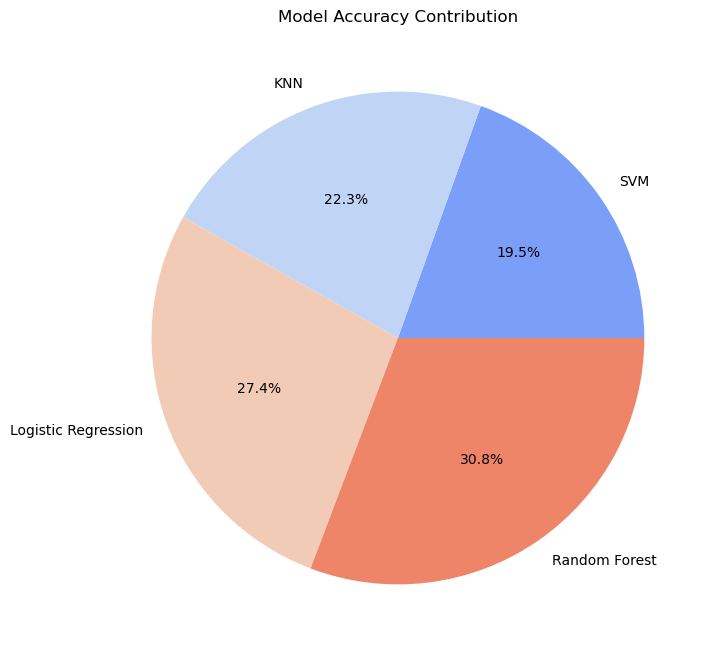

In [72]:
# Visualization for Comparing Accuracy

plt.figure(figsize=(8, 8))
plt.pie(Accuracy_orginal["Accuracy_orginal"], labels=Accuracy_orginal["Model"], autopct="%1.1f%%", colors=sns.color_palette("coolwarm", len(Accuracy_orginal)))
plt.title("Model Accuracy Contribution")
plt.show()

In [73]:
# Display the best model by sorting the dataframe
best_model = Accuracy_orginal.loc[Accuracy_orginal['Accuracy_orginal'].idxmax()]
print(f"Best Model: {best_model['Model']} with Accuracy : {best_model['Accuracy_orginal']}")

Best Model: Random Forest with Accuracy : 0.9992655159750276


In [74]:
# Define model names and accuracy values
models = Accuracy_pca["Model"]
accuracy_pca = Accuracy_pca["Accuracy_pca"]
accuracy_original = Accuracy_orginal["Accuracy_orginal"]

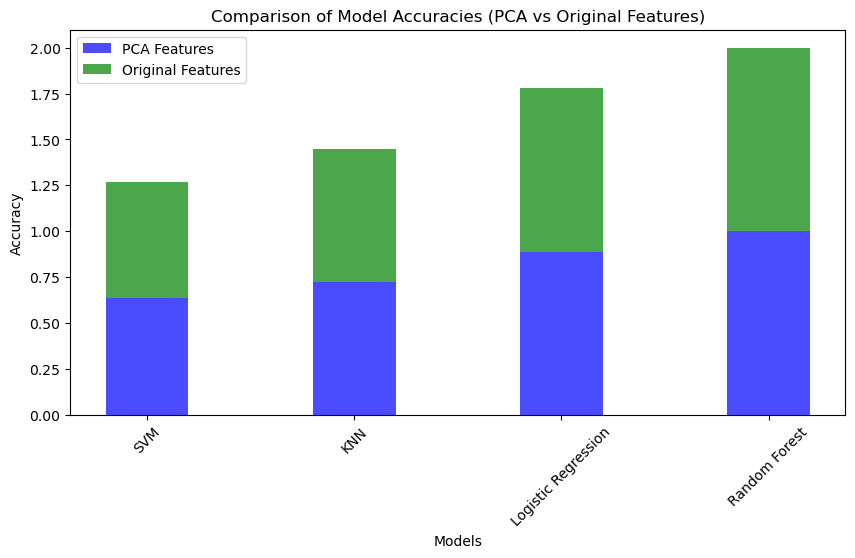

In [75]:
plt.figure(figsize=(10, 5))

# Create a bar chart to compare both accuracies
plt.bar(models, accuracy_pca, width=0.4, label="PCA Features", color="blue", alpha=0.7)
plt.bar(models, accuracy_original, width=0.4, label="Original Features", color="green", alpha=0.7, bottom=accuracy_pca)


plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Comparison of Model Accuracies (PCA vs Original Features)")
plt.legend()
plt.xticks(rotation=45)
plt.show()

# CONCLUSION

### >>> In this project, we analyzed the Dry Bean dataset from the UCI Machine Learning Repository, focusing on classification using various machine learning algorithms. We applied comprehensive preprocessing techniques, including feature scaling and Principal Component Analysis (PCA), to evaluate their impact on model performance.

### >>> Our results showed that the Random Forest classifier achieved the highest accuracy of 99.93% both with and without PCA. This indicates that PCA did not significantly impact the model’s performance, suggesting that the original features already contained sufficient discriminative information.



## Key takeaways from this study:

### >>>>Random Forest outperformed all other classifiers, demonstrating its robustness in handling high-dimensional data.

### .>>>>PCA did not improve accuracy, but it could still be useful for reducing computational complexity in scenarios with larger datasets.

### >>>>Other models, such as SVM,LOGISTIC REGRESSION,KNN  had lower accuracy, possibly due to reasons like overfitting, underfitting, or sensitivity to feature scaling.


### This study highlights the effectiveness of machine learning in agricultural product classification, showing its potential for automating quality control processes. Future work can explore deep learning approaches, feature selection techniques, or ensemble methods to further enhance performance and generalization.

# **END**